In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import chart_studio.plotly as py
import plotly.figure_factory as ff
df = pd.read_csv('data/opportunities.csv',low_memory=False)
#df.info()

In [3]:
df["Last_Modified_Date"] = pd.to_datetime(df["Last_Modified_Date"], errors='coerce')
df["Last_Modified_Date"].head(2)

0   2016-06-13
1   2016-01-15
Name: Last_Modified_Date, dtype: datetime64[ns]

In [4]:
df["Opportunity_Created_Date"] = pd.to_datetime(df["Opportunity_Created_Date"], errors='coerce')
df["Opportunity_Created_Date"].head(2)

0   2015-12-07
1   2015-12-07
Name: Opportunity_Created_Date, dtype: datetime64[ns]

In [5]:
df["diferencia_en_dias"] = (df["Last_Modified_Date"] - df["Opportunity_Created_Date"]).dt.days
df["diferencia_en_dias"].head(2)

0    189
1     39
Name: diferencia_en_dias, dtype: int64

In [6]:
df_agrupado_x_oportunidad = df.groupby(["Opportunity_ID"]).agg({"Stage":'first', "diferencia_en_dias":"first", "ID":"first"}).reset_index()
#df_agrupado_x_oportunidad[df_agrupado_x_oportunidad["Opportunity_ID"] == 2008]

In [7]:
df_cant_oportunidades_por_cant_dias = df_agrupado_x_oportunidad[(df_agrupado_x_oportunidad["Stage"] == "Closed Won") | (df_agrupado_x_oportunidad["Stage"] == "Closed Lost")].groupby(["Stage", "diferencia_en_dias"]).agg({'ID':'count'}).reset_index()
df_cant_oportunidades_por_cant_dias.columns = ["Stage", "duracion_oportunidad_en_dias", "cantidad_oportunidades"]
df_cant_oportunidades_por_cant_dias

,Stage,duracion_oportunidad_en_dias,cantidad_oportunidades
0,Closed Lost,0,21
1,Closed Lost,1,8
2,Closed Lost,2,17
3,Closed Lost,3,10
4,Closed Lost,4,6
...,...,...,...
1094,Closed Won,951,1
1095,Closed Won,956,1
1096,Closed Won,998,1
1097,Closed Won,1037,1


In [8]:
df_cant_oportunidades_por_cant_dias_Won = df_cant_oportunidades_por_cant_dias[df_cant_oportunidades_por_cant_dias["Stage"] == "Closed Won"]
df_cant_oportunidades_por_cant_dias_Lost = df_cant_oportunidades_por_cant_dias[df_cant_oportunidades_por_cant_dias["Stage"] == "Closed Lost"]
#df_cant_oportunidades_por_cant_dias_Won = df_cant_oportunidades_por_cant_dias_Won[df_cant_oportunidades_por_cant_dias_Won["duracion_oportunidad_en_dias"] > 1]
#df_cant_oportunidades_por_cant_dias_Lost = df_cant_oportunidades_por_cant_dias_Lost[df_cant_oportunidades_por_cant_dias_Lost["duracion_oportunidad_en_dias"] > 1]
df_cant_oportunidades_por_cant_dias_Won.head(10)

,Stage,duracion_oportunidad_en_dias,cantidad_oportunidades
610,Closed Won,0,359
611,Closed Won,1,238
612,Closed Won,2,82
613,Closed Won,3,73
614,Closed Won,4,43
615,Closed Won,5,44
616,Closed Won,6,35
617,Closed Won,7,23
618,Closed Won,8,25
619,Closed Won,9,19


Text(0, 0.5, 'Cantidad de oportunidades por duracion de la oportunidad')

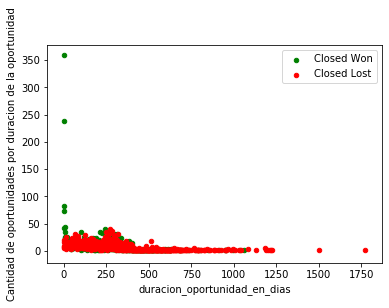

In [9]:
ax = df_cant_oportunidades_por_cant_dias_Won.plot(kind='scatter', x='duracion_oportunidad_en_dias', y='cantidad_oportunidades',color='Green', label='Closed Won')
graf = df_cant_oportunidades_por_cant_dias_Lost.plot(kind='scatter', x='duracion_oportunidad_en_dias', y='cantidad_oportunidades', color='Red', label='Closed Lost', ax=ax)
graf.set_ylabel('Cantidad de oportunidades por duracion de la oportunidad')

In [10]:
df_cant_oportunidades_lost_vs_won = df_agrupado_x_oportunidad[(df_agrupado_x_oportunidad["Stage"] == "Closed Won") | (df_agrupado_x_oportunidad["Stage"] == "Closed Lost")].groupby(["diferencia_en_dias", "Stage"]).agg({'ID':'count'}).unstack()#.reset_index()
df_cant_oportunidades_lost_vs_won.columns = ["cantidad_oportunidades_Lost", "cantidad_oportunidades_Won"]
df_cant_oportunidades_lost_vs_won

,cantidad_oportunidades_Lost,cantidad_oportunidades_Won
diferencia_en_dias,,
0,21.0,359.0
1,8.0,238.0
2,17.0,82.0
3,10.0,73.0
4,6.0,43.0
...,...,...
1214,1.0,NaN
1222,1.0,NaN
1226,1.0,NaN


In [11]:
df_cant_oportunidades_lost_vs_won_perc = df_cant_oportunidades_lost_vs_won.divide(df_cant_oportunidades_lost_vs_won.sum(axis=1), axis=0)
df_cant_oportunidades_lost_vs_won_perc

,cantidad_oportunidades_Lost,cantidad_oportunidades_Won
diferencia_en_dias,,
0,0.055263,0.944737
1,0.032520,0.967480
2,0.171717,0.828283
3,0.120482,0.879518
4,0.122449,0.877551
...,...,...
1214,1.000000,NaN
1222,1.000000,NaN
1226,1.000000,NaN


In [12]:
#df_cant_oportunidades_lost_vs_won_perc.info()

In [13]:
#bla = df_cant_oportunidades_lost_vs_won_perc.dropna()
#len(bla.index)

In [14]:
#df_cant_oportunidades_lost_vs_won_perc = df_cant_oportunidades_lost_vs_won_perc[(df_cant_oportunidades_lost_vs_won_perc.index > 400) & (df_cant_oportunidades_lost_vs_won_perc.index < 450)]
##df_cant_oportunidades_lost_vs_won_perc = df_cant_oportunidades_lost_vs_won_perc.fillna(0)
##df_cant_oportunidades_lost_vs_won_perc = df_cant_oportunidades_lost_vs_won_perc.loc[(df_cant_oportunidades_lost_vs_won_perc["cantidad_oportunidades_Lost"] + df_cant_oportunidades_lost_vs_won_perc["cantidad_oportunidades_Won"]) > 0,:]
#df_cant_oportunidades_lost_vs_won_perc.info()
df_cant_oportunidades_lost_vs_won_perc = df_cant_oportunidades_lost_vs_won_perc.dropna()
#df_cant_oportunidades_lost_vs_won_perc = df_cant_oportunidades_lost_vs_won_perc[(df_cant_oportunidades_lost_vs_won_perc.index > 300) & (df_cant_oportunidades_lost_vs_won_perc.index < 550)]

In [15]:
df_cant_oportunidades_lost_vs_won_perc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 998
Data columns (total 2 columns):
cantidad_oportunidades_Lost    442 non-null float64
cantidad_oportunidades_Won     442 non-null float64
dtypes: float64(2)
memory usage: 10.4 KB


In [16]:
rows = len(df_cant_oportunidades_lost_vs_won_perc.index + 1)
rows

442

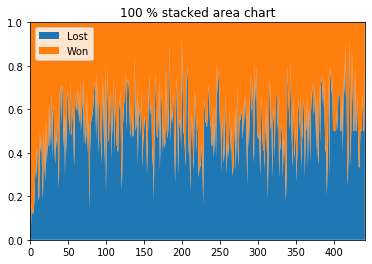

In [17]:
rows = len(df_cant_oportunidades_lost_vs_won_perc.index + 1)
#df_cant_oportunidades_lost_vs_won_perc.index
plt.stackplot(range(0,rows),  df_cant_oportunidades_lost_vs_won_perc["cantidad_oportunidades_Lost"],  df_cant_oportunidades_lost_vs_won_perc["cantidad_oportunidades_Won"], labels=['Lost','Won'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()

In [18]:
data = pd.DataFrame({  'group_A':[1,4,6,8,9], 'group_B':[2,24,7,10,12], 'group_C':[2,8,5,10,6], }, index=range(1,6))
data 

,group_A,group_B,group_C
1,1,2,2
2,4,24,8
3,6,7,5
4,8,10,10
5,9,12,6


In [19]:
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
data_perc



,group_A,group_B,group_C
1,0.200000,0.400000,0.400000
2,0.111111,0.666667,0.222222
3,0.333333,0.388889,0.277778
4,0.285714,0.357143,0.357143
5,0.333333,0.444444,0.222222


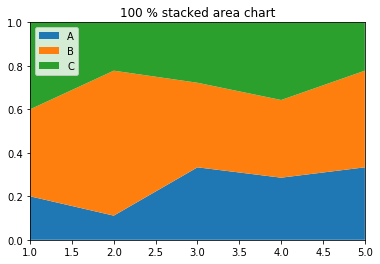

In [20]:
# Make the plot
plt.stackplot(range(1,6),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['A','B','C'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()

In [21]:
#df["Actual_Delivery_Date"].tail(20)
#df["Opportunity_Created_Date"].head(20)
#df[df["ID"] == 12703][["ID","Planned_Delivery_Start_Date"]].tail(20)
#df[df["Actual_Delivery_Date"] != 'NaT'][["ID","Actual_Delivery_Date"]].tail(20)
df["Fecha"] = df["Actual_Delivery_Date"].isnull()
df["Last_Modified_Date"].value_counts()

2018-02-08    5821
2016-12-04    2673
2018-09-06     257
2018-09-26     206
2018-06-09     187
              ... 
2016-02-12       1
2017-01-02       1
2015-07-21       1
2015-11-09       1
2016-09-23       1
Name: Last_Modified_Date, Length: 650, dtype: int64

In [22]:
df["Last_Modified_Date"] = pd.to_datetime(df["Last_Modified_Date"], errors='coerce')
df["Last_Modified_Date"].head(10)
#df[df["Fecha"] != 'NaT'][["ID","Actual_Delivery_Date"]].tail(20)

0   2016-06-13
1   2016-01-15
2   2016-09-29
3   2018-03-27
4   2018-03-27
5   2018-03-27
6   2016-10-07
7   2015-12-09
8   2016-04-05
9   2016-04-05
Name: Last_Modified_Date, dtype: datetime64[ns]

In [23]:
df["Opportunity_Created_Date"] = pd.to_datetime(df["Opportunity_Created_Date"], errors='coerce')
df["Opportunity_Created_Date"].head(12)

0    2015-12-07
1    2015-12-07
2    2015-12-08
3    2015-12-08
4    2015-12-08
5    2015-12-08
6    2015-12-08
7    2015-12-09
8    2015-12-09
9    2015-12-09
10   2015-12-09
11   2015-12-09
Name: Opportunity_Created_Date, dtype: datetime64[ns]

In [24]:
#df_fechas = df[df["ID"] == 27761][["Opportunity_Created_Date", "Last_Modified_Date"]]
df["diferencia_en_dias"] = (df["Last_Modified_Date"] - df["Opportunity_Created_Date"]).dt.days
df[(df["Stage"] == "Closed Won") | (df["Stage"] == "Closed Lost")].groupby(["Stage", "diferencia_en_dias"]).agg( \
                    [('diferencia_en_dias','count')]) #, 'Stage': (lambda x: np.count // 10)})

df[(df["Stage"] == "Closed Won") | (df["Stage"] == "Closed Lost")].groupby(["Stage", "diferencia_en_dias"]).agg({'diferencia_en_dias':'count'})

#.agg(    [('one',  np.mean),     ('two', lambda value: 100* ((value>32).sum() / reading.mean())),     ('test2', lambda value: 100* ((value > 45).sum() / value.mean()))])

diferencia_en_dias
Stage       diferencia_en_dias                    
Closed Lost 0                                   25
            1                                   12
            2                                   27
            3                                   10
            4                                    6
...                                            ...
Closed Won  951                                  1
            956                                  1
            998                                  1
            1037                                 1
            1059                                 1

[1099 rows x 1 columns]

In [25]:
df_cant_oportunidades_por_cant_dias = df[(df["Stage"] == "Closed Won") | (df["Stage"] == "Closed Lost")].groupby(["Stage", "diferencia_en_dias"]).agg({'ID':'count'}).reset_index()
df_cant_oportunidades_por_cant_dias.columns = ["Stage", "duracion_oportunidad_en_dias", "cantidad_oportunidades"]
df_cant_oportunidades_por_cant_dias

,Stage,duracion_oportunidad_en_dias,cantidad_oportunidades
0,Closed Lost,0,25
1,Closed Lost,1,12
2,Closed Lost,2,27
3,Closed Lost,3,10
4,Closed Lost,4,6
...,...,...,...
1094,Closed Won,951,1
1095,Closed Won,956,1
1096,Closed Won,998,1
1097,Closed Won,1037,1


In [26]:
df_cant_oportunidades_por_cant_dias_Won = df_cant_oportunidades_por_cant_dias[df_cant_oportunidades_por_cant_dias["Stage"] == "Closed Won"]
df_cant_oportunidades_por_cant_dias_Lost = df_cant_oportunidades_por_cant_dias[df_cant_oportunidades_por_cant_dias["Stage"] == "Closed Lost"]
df_cant_oportunidades_por_cant_dias_Won.head(10)

,Stage,duracion_oportunidad_en_dias,cantidad_oportunidades
610,Closed Won,0,532
611,Closed Won,1,428
612,Closed Won,2,138
613,Closed Won,3,115
614,Closed Won,4,89
615,Closed Won,5,106
616,Closed Won,6,49
617,Closed Won,7,53
618,Closed Won,8,36
619,Closed Won,9,29


Text(0, 0.5, 'Cantidad de oportunidades por duracion de la oportunidad')

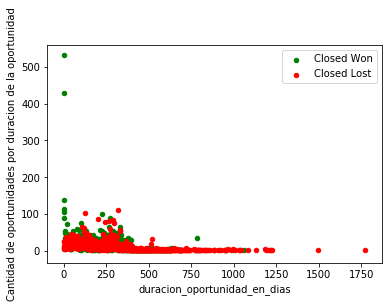

In [27]:
ax = df_cant_oportunidades_por_cant_dias_Won.plot(kind='scatter', x='duracion_oportunidad_en_dias', y='cantidad_oportunidades',color='Green', label='Closed Won')
graf = df_cant_oportunidades_por_cant_dias_Lost.plot(kind='scatter', x='duracion_oportunidad_en_dias', y='cantidad_oportunidades', color='Red', label='Closed Lost', ax=ax)
graf.set_ylabel('Cantidad de oportunidades por duracion de la oportunidad')

In [28]:
df_cant_oportunidades_por_cant_dias["periodo"] = (((df_cant_oportunidades_por_cant_dias["duracion_oportunidad_en_dias"] // 10) + 1) * 10)
#df_cant_oportunidades_por_cant_dias.head(30)
df_won_vs_lost_cada_10_dias = df_cant_oportunidades_por_cant_dias.groupby(["periodo", "Stage"]).agg({'cantidad_oportunidades': 'sum'}).unstack()
df_won_vs_lost_cada_10_dias

cantidad_oportunidades           
Stage              Closed Lost Closed Won
periodo                                  
10                       152.0     1575.0
20                       144.0      301.0
30                       227.0      287.0
40                       146.0      259.0
50                       221.0      155.0
...                        ...        ...
1210                       1.0        NaN
1220                       1.0        NaN
1230                       3.0        NaN
1500                       1.0        NaN
1780                       1.0        NaN

[104 rows x 2 columns]

In [29]:
df_won_vs_lost_cada_10_dias = df_won_vs_lost_cada_10_dias.fillna(0)
#df_won_vs_lost_cada_10_dias = df_won_vs_lost_cada_10_dias.dropna()

In [30]:
df_won_vs_lost_cada_10_dias_perc = df_won_vs_lost_cada_10_dias.divide(df_won_vs_lost_cada_10_dias.sum(axis=1), axis=0)
df_won_vs_lost_cada_10_dias_perc.columns = ["Lost","Won"]
df_won_vs_lost_cada_10_dias_perc

,Lost,Won
periodo,,
10,0.088014,0.911986
20,0.323596,0.676404
30,0.441634,0.558366
40,0.360494,0.639506
50,0.587766,0.412234
...,...,...
1210,1.000000,0.000000
1220,1.000000,0.000000
1230,1.000000,0.000000


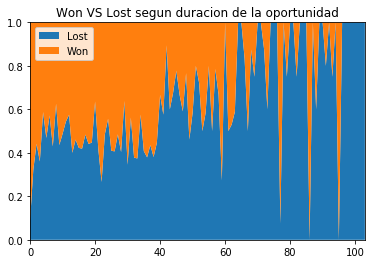

In [31]:
rows = len(df_won_vs_lost_cada_10_dias_perc.index + 1)
#df_cant_oportunidades_lost_vs_won_perc.index
plt.stackplot(range(0,rows),  df_won_vs_lost_cada_10_dias_perc["Lost"],  df_won_vs_lost_cada_10_dias_perc["Won"], labels=['Lost','Won'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('Won VS Lost segun duracion de la oportunidad')
plt.show()

In [32]:
df_cant_oportunidades_por_cant_dias


df[(df["Stage"] == "Closed Won") | (df["Stage"] == "Closed Lost")].groupby(["Stage", "diferencia_en_dias"]).agg( \
                                                    {'diferencia_en_dias':'count'
                                                     ,'Stage': lambda x: ((x.count() // 10) + 1)*10
                                                    })

diferencia_en_dias  Stage
Stage       diferencia_en_dias                           
Closed Lost 0                                   25     30
            1                                   12     20
            2                                   27     30
            3                                   10     20
            4                                    6     10
...                                            ...    ...
Closed Won  951                                  1     10
            956                                  1     10
            998                                  1     10
            1037                                 1     10
            1059                                 1     10

[1099 rows x 2 columns]

In [33]:
df.groupby(["Opportunity_ID"]).agg({"ID":'min', "Stage":'count'}).nlargest(10,"Stage")

,ID,Stage
Opportunity_ID,,
2008,7710,36
12460,20112,36
5123,15039,26
6606,20524,26
2911,27881,24
767,14464,18
4568,9553,16
6652,21991,16
6653,21864,16


In [34]:
df[df["Opportunity_ID"] == 2008][["ID", "Opportunity_ID", "Opportunity_Created_Date", "Last_Modified_Date", "Stage"]]

,ID,Opportunity_ID,Opportunity_Created_Date,Last_Modified_Date,Stage
3586,7710,2008,2016-07-11,2018-09-06,Closed Won
3587,7715,2008,2016-07-11,2018-09-06,Closed Won
3588,7722,2008,2016-07-11,2018-09-06,Closed Won
3589,7727,2008,2016-07-11,2018-09-06,Closed Won
3590,7733,2008,2016-07-11,2018-09-06,Closed Won
3591,7738,2008,2016-07-11,2018-09-06,Closed Won
3592,7744,2008,2016-07-11,2018-09-06,Closed Won
3593,7749,2008,2016-07-11,2018-09-06,Closed Won
3594,7755,2008,2016-07-11,2018-09-06,Closed Won
3595,7760,2008,2016-07-11,2018-09-06,Closed Won


In [35]:
a = df[df["Last_Modified_Date"] == df["Opportunity_Created_Date"]][["ID", "Last_Modified_Date", "Opportunity_Created_Date","Stage"]]
a.groupby(["Stage"]).agg({"ID":"count"})

,ID
Stage,
Closed Lost,25
Closed Won,532
Proposal,10
Qualification,11


In [36]:
df_fechas = df[df["ID"] == 27761][["Opportunity_Created_Date", "Last_Modified_Date"]]
df_fechas["diferencia"] = (df_fechas["Last_Modified_Date"] - df_fechas["Opportunity_Created_Date"]).dt.days
df_fechas["mod"] = df_fechas["diferencia"] // 10
df_fechas

,Opportunity_Created_Date,Last_Modified_Date,diferencia,mod
0,2015-12-07,2016-06-13,189,18


In [37]:
ax = df_scatter_filter.plot(kind='scatter', x='item_count', y='Closed Won',color='Green', \
                               label='Closed Won')

graf = df_scatter_filter.plot(kind='scatter', x='item_count', y='Closed Lost',
         color='Red', label='Closed Lost', ax=ax)

graf = df_scatter_filter.plot(kind='scatter', x='item_count', y='Negotiation',
         color='Yellow', label='Negotiation', ax=ax)

graf = df_scatter_filter.plot(kind='scatter', x='item_count', y='Proposal',
         color='Cyan', label='Proposal', ax=ax)

graf = df_scatter_filter.plot(kind='scatter', x='item_count', y='Qualification',
         color='Orange', label='Qualification', ax=ax)

graf.set_ylabel('Cantidad de oportunidades')
graf.set_xlabel('Cantidad de items')

NameError: name 'df_scatter_filter' is not defined

In [ ]:
ax = ([ 1, 2, 3, 2, 2, 1, 1, 1, 1, 1])

graf = df_scatter_filter.plot(kind='scatter', x='item_count', y='Closed Lost',
         color='Red', label='Closed Lost', ax=ax)

graf = df_scatter_filter.plot(kind='scatter', x='item_count', y='Negotiation',
         color='Yellow', label='Negotiation', ax=ax)

graf = df_scatter_filter.plot(kind='scatter', x='item_count', y='Proposal',
         color='Cyan', label='Proposal', ax=ax)

graf = df_scatter_filter.plot(kind='scatter', x='item_count', y='Qualification',
         color='Orange', label='Qualification', ax=ax)

graf.set_ylabel('Cantidad de oportunidades')
graf.set_xlabel('Cantidad de items')

In [ ]:
df['Account_Owner'].value_counts()

In [ ]:
df['Brand'].value_counts()

In [ ]:
df['Product_Type'].value_counts()

In [ ]:

# Make data
data = pd.DataFrame({  'group_A':[1,3,6,8,9], 'group_B':[1,3,7,10,30], }, index=range(1,6))
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.stackplot(range(1,6),  data_perc["group_A"],  data_perc["group_B"],   labels=['A','B','C'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()


PRUEBAS

In [ ]:
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
x = np.random.randn(20)
y = ([ 1, 2, 3, 2, 2, 1, 1, 1, 1, 1])
ax = sns.distplot(y)
plt.show()